#### BERT

https://www.youtube.com/watch?v=RgpANRh44ao

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 

In [166]:
df_train = pd.read_csv('original_train_data.csv')
df_test = pd.read_csv('original_test_data.csv')
#df_test = df_test[df_test['maslow']!='none']
#df_train = df_train[df_train['maslow']!='none']
df_test = df_test[['sentence','maslow']]
df_train = df_train[['sentence','maslow']]
df_train['needOrnoneed'] = df_train['maslow']
df_train['needOrnoneed'] = df_train['maslow'].replace(['physiological','love','stability','esteem','spiritual growth','none'],['need','need','need','need','need','no need'])
df_test['needOrnoneed'] = df_test['maslow']
df_test['needOrnoneed'] = df_test['maslow'].replace(['physiological','love','stability','esteem','spiritual growth','none'],['need','need','need','need','need','no need'])
df_train.head()

,sentence,maslow,needOrnoneed
0,Melissa never drank wine.Melissa broke up with...,physiological,need
1,Ray couldn't get an irritating tune out of his...,none,no need
2,The family shared a basket of fries.The son at...,physiological,need
3,Poppy started going to dance school.She knew s...,stability,need
4,Our neighbor Tracy has a boy and a girl in ele...,love,need


In [167]:
df_test.tail()

,sentence,maslow,needOrnoneed
4114,Candy heard that her very favorite band was pl...,esteem,need
4115,"Morgan loved riding her bicycle.One day, she r...",stability,need
4116,My father liked to eat oysters.One day he brou...,none,no need
4117,"When I was a boy, I rode my bike down a local ...",none,no need
4118,Jules wanted to cook for her family.She decide...,love,need


In [168]:
!pip install text_hammer
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [169]:
from tqdm._tqdm_notebook import tqdm_notebook 
import text_hammer as th
tqdm_notebook.pandas()

def text_preprocessing(df, column_name):
    column = column_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return(df)
df_train_cleaned = text_preprocessing(df_train,'sentence')
df_test_cleaned = text_preprocessing(df_test,'sentence')

  0%|          | 0/16474 [00:00<?, ?it/s]

  0%|          | 0/16474 [00:00<?, ?it/s]

  0%|          | 0/16474 [00:00<?, ?it/s]

  0%|          | 0/16474 [00:00<?, ?it/s]

  0%|          | 0/16474 [00:00<?, ?it/s]

  0%|          | 0/16474 [00:00<?, ?it/s]

  0%|          | 0/4119 [00:00<?, ?it/s]

  0%|          | 0/4119 [00:00<?, ?it/s]

  0%|          | 0/4119 [00:00<?, ?it/s]

  0%|          | 0/4119 [00:00<?, ?it/s]

  0%|          | 0/4119 [00:00<?, ?it/s]

  0%|          | 0/4119 [00:00<?, ?it/s]

In [170]:
df_train_cleaned.head()

,sentence,maslow,needOrnoneed
0,melissa never drank winemelissa broke up with ...,physiological,need
1,ray could not get an irritating tune out of hi...,none,no need
2,the family shared a basket of friesthe son ate...,physiological,need
3,poppy started going to dance schoolshe knew sh...,stability,need
4,our neighbor tracy has a boy and a girl in ele...,love,need


In [171]:
df_test_cleaned.head()

,sentence,maslow,needOrnoneed
0,jamies job requires her to travel a lotshe has...,esteem,need
1,andy was craving some cerealhe picked out some...,physiological,need
2,karl locked his car,stability,need
3,i was bullied in high schooli had one bully in...,stability,need
4,kay was at work when a headache started,stability,need


In [172]:
df_cleaned = df_train_cleaned.copy()

In [173]:
df_cleaned['num_words'] = df_cleaned.sentence.apply(lambda x:len(x.split()))
df_cleaned.head()

,sentence,maslow,needOrnoneed,num_words
0,melissa never drank winemelissa broke up with ...,physiological,need,18
1,ray could not get an irritating tune out of hi...,none,no need,11
2,the family shared a basket of friesthe son ate...,physiological,need,21
3,poppy started going to dance schoolshe knew sh...,stability,need,27
4,our neighbor tracy has a boy and a girl in ele...,love,need,25


In [174]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16474 entries, 0 to 16473
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentence      16474 non-null  object
 1   maslow        16474 non-null  object
 2   needOrnoneed  16474 non-null  object
 3   num_words     16474 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 514.9+ KB


In [175]:
df_cleaned['maslow'] = df_cleaned.maslow.astype('category')
df_test_cleaned['maslow'] = df_test_cleaned.maslow.astype('category')
df_cleaned['needOrnoneed'] = df_cleaned.needOrnoneed.astype('category')
df_test_cleaned['needOrnoneed'] = df_test_cleaned.needOrnoneed.astype('category')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16474 entries, 0 to 16473
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sentence      16474 non-null  object  
 1   maslow        16474 non-null  category
 2   needOrnoneed  16474 non-null  category
 3   num_words     16474 non-null  int64   
dtypes: category(2), int64(1), object(1)
memory usage: 290.0+ KB


In [69]:
print(df_cleaned.needOrnoneed.unique())

['need', 'no need']
Categories (2, object): ['need', 'no need']


In [70]:
df_cleaned.needOrnoneed

0           need
1        no need
2           need
3           need
4           need
          ...   
16469       need
16470    no need
16471       need
16472       need
16473       need
Name: needOrnoneed, Length: 16474, dtype: category
Categories (2, object): ['need', 'no need']

In [71]:
print(df_cleaned.needOrnoneed.cat.codes)

0        0
1        1
2        0
3        0
4        0
        ..
16469    0
16470    1
16471    0
16472    0
16473    0
Length: 16474, dtype: int8


In [176]:
#encoded_dict = {'esteem':0, 'love':1, 'none':2, 'physiological':3, 'spiritual growth':4, 'stability':5}
encoded_dict = {'need':0, 'no need':1}
df_cleaned['needOrnoneed'] = df_cleaned.needOrnoneed.cat.codes
df_test_cleaned['needOrnoneed'] = df_test_cleaned.needOrnoneed.cat.codes
df_cleaned.needOrnoneed

0        0
1        1
2        0
3        0
4        0
        ..
16469    0
16470    1
16471    0
16472    0
16473    0
Name: needOrnoneed, Length: 16474, dtype: int8

In [73]:
df_cleaned.head()

,sentence,maslow,needOrnoneed,num_words
0,melissa never drank winemelissa broke up with ...,physiological,0,18
1,ray could not get an irritating tune out of hi...,none,1,11
2,the family shared a basket of friesthe son ate...,physiological,0,21
3,poppy started going to dance schoolshe knew sh...,stability,0,27
4,our neighbor tracy has a boy and a girl in ele...,love,0,25


In [74]:
df_test_cleaned.head()

,sentence,maslow,needOrnoneed
0,jamies job requires her to travel a lotshe has...,esteem,0
1,andy was craving some cerealhe picked out some...,physiological,0
2,karl locked his car,stability,0
3,i was bullied in high schooli had one bully in...,stability,0
4,kay was at work when a headache started,stability,0


In [75]:
df_cleaned.num_words.max()

67

In [118]:
from sklearn.model_selection import train_test_split
data_train = df_cleaned
data_test = df_test_cleaned
print(data_train.shape)
print(data_test.shape)

(16474, 4)
(4119, 4)


In [78]:
from tensorflow.keras.utils import to_categorical
to_categorical(data_train.needOrnoneed)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [79]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#tokenizer.save_pretrained('bert-tokenizer')
#bert.save_pretrained('bert-model')

In [ ]:
#import shutil 
#shutil.make_archive('bert-tokenizer','zip','bert-tokenizer')
#shutil.make_archive('bert-model','zip','bert-model')

In [ ]:
#from transformers import BertTokenizer, TFBertModel, BertConfig, TFDistilBertModel, DistilBertTokenizer, DistilBertConfig
#dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

In [87]:
x_train = tokenizer(
    text = data_train.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

In [88]:
x_train

{'input_ids': <tf.Tensor: shape=(16474, 70), dtype=int32, numpy=
array([[  101,  1143,  6137, ...,     0,     0,     0],
       [  101,  7586,  1180, ...,     0,     0,     0],
       [  101,  1103,  1266, ...,     0,     0,     0],
       ...,
       [  101,  1112,   178, ...,     0,     0,     0],
       [  101,  1139,  1676, ...,     0,     0,     0],
       [  101, 27629,  7777, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(16474, 70), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [89]:
x_test

{'input_ids': <tf.Tensor: shape=(4119, 70), dtype=int32, numpy=
array([[  101, 17462,  1905, ...,     0,     0,     0],
       [  101,  1105,  1183, ...,     0,     0,     0],
       [  101, 24181, 17670, ...,     0,     0,     0],
       ...,
       [  101,  1139,  1401, ...,     0,     0,     0],
       [  101,  1165,   178, ...,     0,     0,     0],
       [  101,   179, 11806, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(4119, 70), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [90]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.initializers import TruncatedNormal 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf 
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [91]:
max_len = 70 
input_ids = Input(shape = (max_len,), dtype = tf.int32, name = 'input_ids')
input_mask = Input(shape = (max_len,), dtype = tf.int32, name = 'attention_mask') 
embeddings = bert(input_ids, attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation = 'relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(2, activation = 'sigmoid')(out)
model = tf.keras.Model(inputs = [input_ids, input_mask], outputs = y)
model.layers[2].trainable = True

In [92]:
model.layers

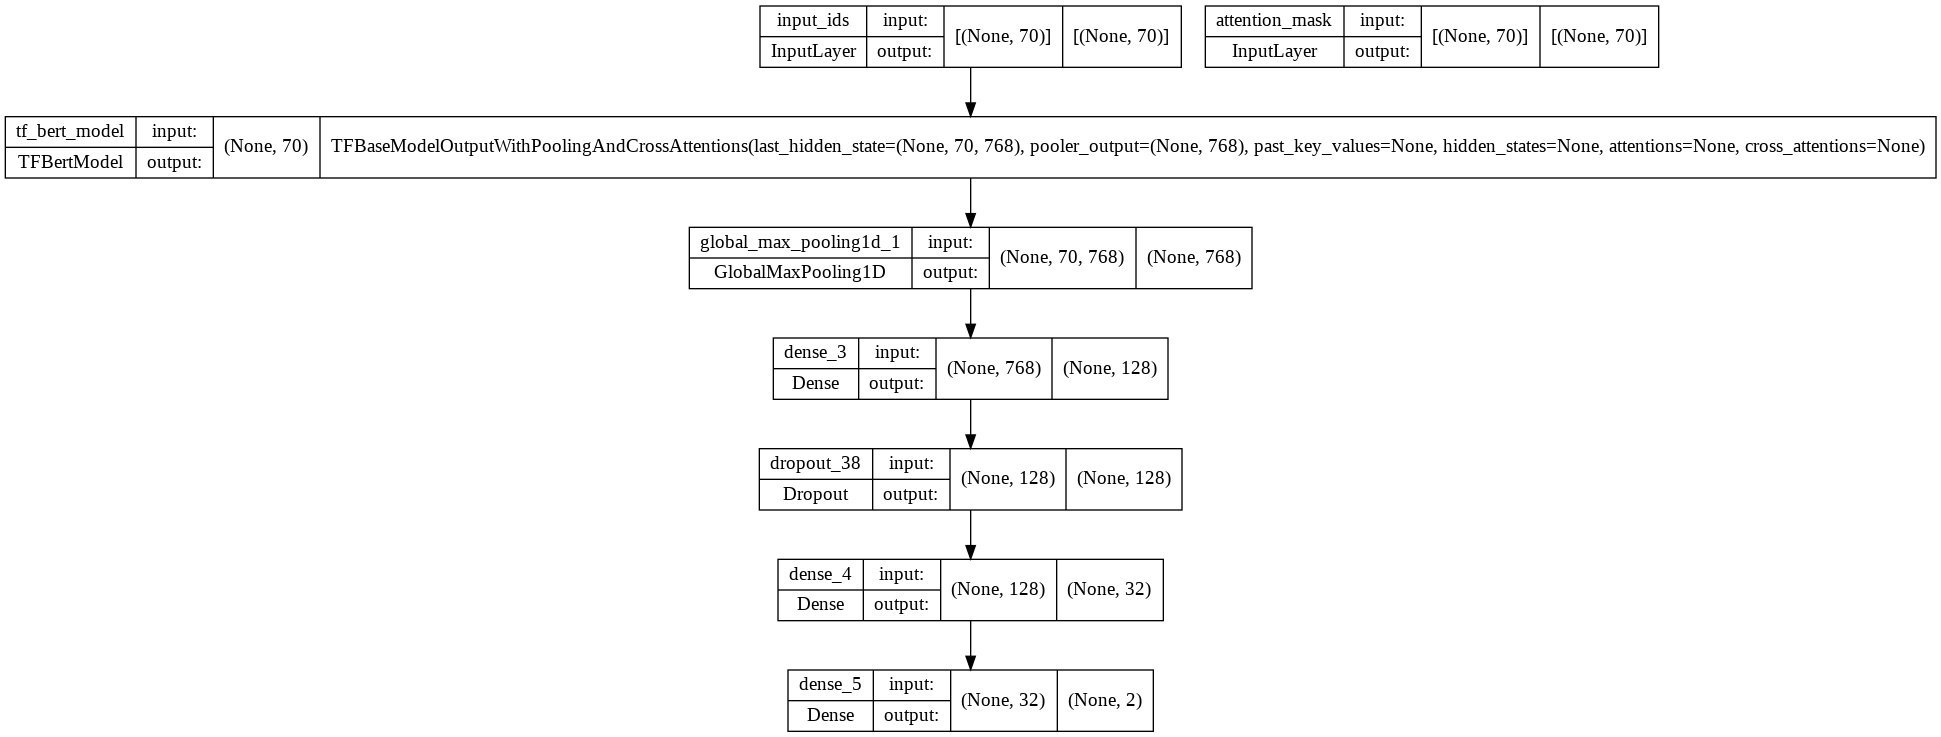

In [93]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [94]:
optimizer = Adam(
    learning_rate = 5e-05,
    epsilon = 1e-08,
    decay = 0.01,
    clipnorm = 1.0
)

#loss = CategoricalCrossentropy() 
metric = CategoricalAccuracy('balanced_accuracy')
model.compile(optimizer = optimizer, loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = metric)

In [95]:
#tf.config.experimental_run_functions_eagerly(True)
#tf.config.run_functions_eagerly(True)

In [97]:
for i in range(5):
    answer = int(input("Do you want to run another epoch?1/0: "))
    if answer == 1:
        train_history = model.fit(x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
                            y = to_categorical(data_train.needOrnoneed),
                            validation_data = (
                                {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}, to_categorical(data_test.needOrnoneed)
                            ),
                            epochs = 5,
                            batch_size = 36,
                            )
    else:
        break

Do you want to run another epoch?1/0: 1
Epoch 1/5


458/458 [==============================] - 283s 570ms/step - loss: 0.3594 - balanced_accuracy: 0.8762 - val_loss: 0.3497 - val_balanced_accuracy: 0.8759
Epoch 2/5
458/458 [==============================] - 258s 563ms/step - loss: 0.3170 - balanced_accuracy: 0.8791 - val_loss: 0.3546 - val_balanced_accuracy: 0.8687
Epoch 3/5
458/458 [==============================] - 259s 565ms/step - loss: 0.2795 - balanced_accuracy: 0.8914 - val_loss: 0.3733 - val_balanced_accuracy: 0.8643
Epoch 4/5
458/458 [==============================] - 259s 565ms/step - loss: 0.2461 - balanced_accuracy: 0.9036 - val_loss: 0.3952 - val_balanced_accuracy: 0.8526
Epoch 5/5
458/458 [==============================] - 258s 563ms/step - loss: 0.2161 - balanced_accuracy: 0.9167 - val_loss: 0.4291 - val_balanced_accuracy: 0.8490
Do you want to run another epoch?1/0: 0


In [98]:
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

array([0.98596996, 0.16959926], dtype=float32)

In [119]:
data_train.head()

,sentence,maslow,needOrnoneed,num_words
0,melissa never drank winemelissa broke up with ...,physiological,0,18
1,ray could not get an irritating tune out of hi...,none,1,11
2,the family shared a basket of friesthe son ate...,physiological,0,21
3,poppy started going to dance schoolshe knew sh...,stability,0,27
4,our neighbor tracy has a boy and a girl in ele...,love,0,25


In [210]:
df_cleaned = df_train_cleaned.copy()
df_cleaned = df_cleaned[df_cleaned['maslow']!='none']
df_cleaned = df_cleaned.reset_index()
df_cleaned = df_cleaned[['sentence','maslow','needOrnoneed']]
df_cleaned['num_words'] = df_cleaned.sentence.apply(lambda x:len(x.split()))
df_cleaned['maslow'] = df_cleaned.maslow.astype('category')
df_test_cleaned['maslow'] = df_test_cleaned.maslow.astype('category')
df_cleaned['needOrnoneed'] = df_cleaned.needOrnoneed.astype('category')
df_test_cleaned['needOrnoneed'] = df_test_cleaned.needOrnoneed.astype('category')
df_cleaned['maslowenc'] = df_cleaned.maslow.cat.codes
df_test_cleaned['maslowenc'] = df_test_cleaned.maslow.cat.codes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14440 entries, 0 to 14439
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sentence      14440 non-null  object  
 1   maslow        14440 non-null  category
 2   needOrnoneed  14440 non-null  category
 3   num_words     14440 non-null  int64   
 4   maslowenc     14440 non-null  int8    
dtypes: category(2), int64(1), int8(1), object(1)
memory usage: 268.4+ KB


In [230]:
df_cleaned.head()

,sentence,maslow,needOrnoneed,num_words,maslowenc
0,melissa never drank winemelissa broke up with ...,physiological,need,18,2
1,the family shared a basket of friesthe son ate...,physiological,need,21,2
2,poppy started going to dance schoolshe knew sh...,stability,need,27,4
3,our neighbor tracy has a boy and a girl in ele...,love,need,25,1
4,sarah found herself easily distractedshe felt ...,esteem,need,28,0


In [215]:
data_test = data_test[data_test['predneedOrnoneed'] == 0]
data_test.reset_index()
data_test = data_test[['sentence','maslow','needOrnoneed','predneedOrnoneed']]

In [217]:
from sklearn.model_selection import train_test_split
data_train_maslow = df_cleaned
data_test_maslow = df_test_cleaned
print(data_train_maslow.shape)
print(data_test_maslow.shape)

(14440, 5)
(4119, 4)


In [218]:
encoded_dict = {'esteem':0, 'love':1,  'physiological':2, 'spiritual growth':3, 'stability':4}

In [219]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [231]:
x_train = tokenizer(
    text = data_train_maslow.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

x_test = tokenizer(
    text = data_test_maslow.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

In [232]:
max_len = 70 
input_ids = Input(shape = (max_len,), dtype = tf.int32, name = 'input_ids')
input_mask = Input(shape = (max_len,), dtype = tf.int32, name = 'attention_mask') 
embeddings = bert(input_ids, attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation = 'relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(5, activation = 'sigmoid')(out)
model = tf.keras.Model(inputs = [input_ids, input_mask], outputs = y)
model.layers[2].trainable = True

In [233]:
optimizer = Adam(
    learning_rate = 5e-05,
    epsilon = 1e-08,
    decay = 0.01,
    clipnorm = 1.0
)

In [234]:
metric = CategoricalAccuracy('balanced_accuracy')
model.compile(optimizer = optimizer, loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = metric)

In [235]:
for i in range(5):
    answer = int(input("Do you want to run another epoch?1/0: "))
    if answer == 1:
        train_history = model.fit(x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
                            y = to_categorical(data_train_maslow.maslowenc),
                            epochs = 5,
                            batch_size = 36,
                            )
    else:
        break

Do you want to run another epoch?1/0: 1
Epoch 1/5


402/402 [==============================] - 233s 524ms/step - loss: 1.1738 - balanced_accuracy: 0.5399
Epoch 2/5
402/402 [==============================] - 210s 523ms/step - loss: 0.9374 - balanced_accuracy: 0.6555
Epoch 3/5
402/402 [==============================] - 209s 520ms/step - loss: 0.8340 - balanced_accuracy: 0.6952
Epoch 4/5
402/402 [==============================] - 209s 520ms/step - loss: 0.7720 - balanced_accuracy: 0.7211
Epoch 5/5
402/402 [==============================] - 209s 520ms/step - loss: 0.7140 - balanced_accuracy: 0.7443
Do you want to run another epoch?1/0: 0


In [275]:
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

array([0.37686867, 0.8849485 , 0.08370234, 0.42868948, 0.29097492],
      dtype=float32)

In [279]:
data_test_maslow.head(20)
data_test_maslow['maslowenc'] = data_test_maslow['maslowenc'].replace(['esteem','physiological','stability','none','love','spiritual growth	'],
                                                                      [0,2,4,5,1,3])
#number = [0,1,2,3,4]
#category = ['esteem', 'love', 'physiological', 'spiritual growth', 'stability']
# Labelling 5 as none

In [280]:
y_predicted = np.argmax(predicted_raw, axis = 1)

In [281]:
data_test_maslow['predmaslow'] = y_predicted

In [282]:
data_test_maslow.predmaslow

0       1
1       2
2       4
3       0
4       4
       ..
4114    1
4115    4
4116    2
4117    4
4118    1
Name: predmaslow, Length: 4119, dtype: int64

In [283]:
data_test_maslow.head()

,sentence,maslow,needOrnoneed,maslowenc,predmaslow
0,jamies job requires her to travel a lotshe has...,esteem,0,0,1
1,andy was craving some cerealhe picked out some...,physiological,0,3,2
2,karl locked his car,stability,0,5,4
3,i was bullied in high schooli had one bully in...,stability,0,5,0
4,kay was at work when a headache started,stability,0,5,4


In [288]:
#category = ['esteem', 'love', 'physiological', 'spiritual growth', 'stability','none']
#print(classification_report(data_test_maslow.maslowenc, y_predicted,target_names = category))

In [289]:
#import seaborn as sns
#import sklearn
#r2 = sklearn.metrics.confusion_matrix(y_predicted, data_test_maslow.maslowenc)
#print(r2)
#ax = sns.heatmap(r2, annot=True, cmap='Blues')

In [292]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [290]:
#import matplotlib.pyplot as plt
#number = [0,1,2,3,4,5]
#category = ['esteem', 'love', 'physiological', 'spiritual growth', 'stability','none']
#make_confusion_matrix(r2, group_names=number, categories=category, cmap='Blues')

In [293]:
data_test_maslow['predmaslow'] = y_predicted 
number = [0,1,2,3,4]
category = ['esteem', 'love', 'physiological', 'spiritual growth', 'stability']
data_test_maslow['predmaslow'] = data_test_maslow['predmaslow'].replace([0,1,2,3,4],['esteem','love','physiological','spiritual growth','stability'])
data_test_maslow.head()

,sentence,maslow,needOrnoneed,maslowenc,predmaslow
0,jamies job requires her to travel a lotshe has...,esteem,0,0,love
1,andy was craving some cerealhe picked out some...,physiological,0,3,physiological
2,karl locked his car,stability,0,5,stability
3,i was bullied in high schooli had one bully in...,stability,0,5,esteem
4,kay was at work when a headache started,stability,0,5,stability


In [297]:
# UNABLE TO DRAW CONFUSION MATRIX AND CLASSIFICATION REPORT BECAUSE THE TEST DATA WHICH WAS CLASSIFIED AS NEED MIGHT HAVE THEIR ORIGINAL LABEL AS NONE 
data_test_maslow[['sentence','maslow','predmaslow']].groupby(['maslow','predmaslow']).count()

sentence
maslow           predmaslow                
esteem           esteem                 623
                 love                   152
                 physiological           37
                 spiritual growth        71
                 stability              155
love             esteem                 112
                 love                   620
                 physiological           52
                 spiritual growth        39
                 stability               77
none             esteem                 108
                 love                   101
                 physiological           66
                 spiritual growth        53
                 stability              181
physiological    esteem                  28
                 love                    39
                 physiological          307
                 spiritual growth        23
                 stability               58
spiritual growth esteem                 110
                 love                    69
                 physiological           29
                 spiritual growth       201
                 stability               63
stability        esteem                 129
                 love                    64
                 physiological           50
                 spiritual growth        42
                 stability              460

In [259]:
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 

In [260]:
predicted = data_test_maslow.copy()
predicted.head()

,sentence,maslow,needOrnoneed,maslowenc,predmaslow
0,jamies job requires her to travel a lotshe has...,esteem,0,0,love
1,andy was craving some cerealhe picked out some...,physiological,0,3,physiological
2,karl locked his car,stability,0,5,stability
3,i was bullied in high schooli had one bully in...,stability,0,5,esteem
4,kay was at work when a headache started,stability,0,5,stability


In [261]:
number = [0,1,2,3,4]
category = ['esteem', 'love', 'physiological', 'spiritual growth', 'stability']
for i in category:
    predicted[i] = 0

lis_esteem = []
lis_love = []
lis_physiological = []
lis_spiritual_growth = []
lis_stability = []

for i in range(len(predicted_raw)):
    lis_esteem.append(predicted_raw[i][0])
    lis_love.append(predicted_raw[i][1])
    lis_physiological.append(predicted_raw[i][2])
    lis_spiritual_growth.append(predicted_raw[i][3])
    lis_stability.append(predicted_raw[i][4])

predicted['esteem'] = lis_esteem
predicted['love'] = lis_love
predicted['physiological'] = lis_physiological
predicted['spiritual growth'] = lis_spiritual_growth
predicted['stability'] = lis_stability
predicted.head()

,sentence,maslow,needOrnoneed,maslowenc,predmaslow,esteem,love,physiological,spiritual growth,stability
0,jamies job requires her to travel a lotshe has...,esteem,0,0,love,0.376869,0.884948,0.083702,0.428689,0.290975
1,andy was craving some cerealhe picked out some...,physiological,0,3,physiological,0.104512,0.085441,0.961715,0.031225,0.154339
2,karl locked his car,stability,0,5,stability,0.181373,0.061904,0.133493,0.052889,0.585770
3,i was bullied in high schooli had one bully in...,stability,0,5,esteem,0.745958,0.070819,0.028442,0.177755,0.270201
4,kay was at work when a headache started,stability,0,5,stability,0.105062,0.052872,0.427903,0.029700,0.630253


In [262]:
predicted = predicted.drop(columns = ['needOrnoneed','maslowenc','predmaslow'])
predicted.head()

,sentence,maslow,esteem,love,physiological,spiritual growth,stability
0,jamies job requires her to travel a lotshe has...,esteem,0.376869,0.884948,0.083702,0.428689,0.290975
1,andy was craving some cerealhe picked out some...,physiological,0.104512,0.085441,0.961715,0.031225,0.154339
2,karl locked his car,stability,0.181373,0.061904,0.133493,0.052889,0.585770
3,i was bullied in high schooli had one bully in...,stability,0.745958,0.070819,0.028442,0.177755,0.270201
4,kay was at work when a headache started,stability,0.105062,0.052872,0.427903,0.029700,0.630253


In [263]:
from google.colab import files
predicted.to_excel('predicted.xlsx')
files.download('predicted.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>